In [1]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate 10000 rows of data
n_rows = 10000

# Generate independent variables
X1 = np.random.rand(n_rows)
X2 = np.random.rand(n_rows)
X3 = np.random.rand(n_rows)
X4 = np.random.rand(n_rows)

# Generate dependent variable as a noisy polynomial of degree 4
Y = 3*X1**4 + 2*X2**3 - 5*X3**2 + 4*X4 + np.random.normal(0, 0.1, n_rows)

# Create a DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'Y': Y})

# Save the DataFrame to a text file
df.to_csv('dataset.txt', index=False, sep='\t')

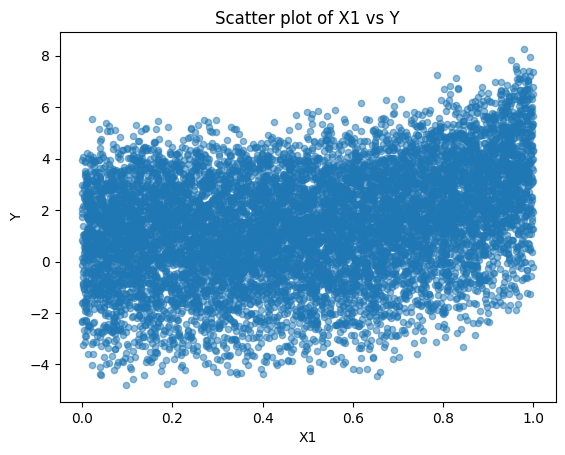

In [2]:
import matplotlib.pyplot as plt

# Plot the dataframe
df.plot(kind='scatter', x='X1', y='Y', alpha=0.5)
plt.title('Scatter plot of X1 vs Y')
plt.show()

In [5]:
start_time = time.time()
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Start the timer

# Read the dataset
df = pd.read_csv('dataset.txt', sep='\t')

# Split the data into features and target variable
X = df[['X1', 'X2', 'X3', 'X4']]
y = df['Y']

# Create polynomial features of degree 4
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict the target variable
y_pred = model.predict(X_poly)
# Calculate the relative mean absolute error
rmae = np.mean(np.abs((y - y_pred) / y))

# Print the relative mean absolute error
print(f'Relative Mean Absolute Error: {rmae}')

# Print the total time taken
end_time = time.time()
print(f'Total time taken: {end_time - start_time} seconds')

Relative Mean Absolute Error: 0.23804813512084083
Total time taken: 0.27805352210998535 seconds
